In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
np.random.seed(46) 
population_age_1 = poisson.rvs(loc=18, mu=35, size=150000)
population_age_2 = poisson.rvs(loc=18, mu=10, size=100000)
population = np.concatenate((population_age_1, population_age_2))
print(len(population))
print(population.mean())

250000
42.991528


In [6]:
sample = np.random.choice(a=population, size=1000)
print(sample.mean())
print(population.mean() - sample.mean())

42.932
0.05952800000000025


In [7]:
population_races = (["white"]*100000) + (["black"]*50000) + \
                   (["hispanic"]*50000) + (["asian"]*25000) + \
                   (["other"]*25000)

for race in set(population_races):
    print(race + " proportion estimate:")
    print(population_races.count(race)/250000)

demo_sample = random.sample(population_races, 1000)
print(set(demo_sample))
for race in set(demo_sample):
    print(race + " proportion estimate:")
    print(demo_sample.count(race)/1000)
    


other proportion estimate:
0.1
black proportion estimate:
0.2
hispanic proportion estimate:
0.2
asian proportion estimate:
0.1
white proportion estimate:
0.4
{'other', 'black', 'hispanic', 'asian', 'white'}
other proportion estimate:
0.106
black proportion estimate:
0.199
hispanic proportion estimate:
0.21
asian proportion estimate:
0.094
white proportion estimate:
0.391


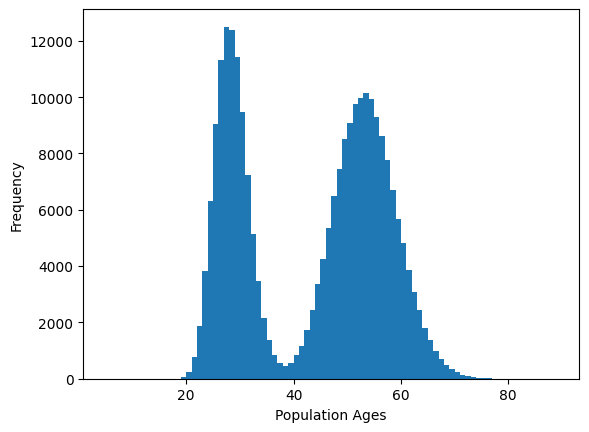

In [8]:
plt.hist(population, bins=range(5, 90, 1))
plt.xlabel("Population Ages")
plt.ylabel("Frequency")
plt.show()

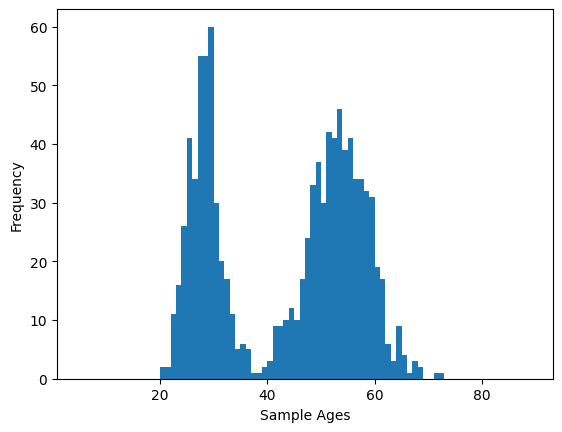

In [9]:
plt.hist(sample, bins=range(5, 90, 1))
plt.xlabel("Sample Ages")
plt.ylabel("Frequency")
plt.show()

In [10]:
point_estimates = []  
for iteration in range(200):
    sample = np.random.choice(a=population, size=200)
    point_estimates.append(sample.mean())

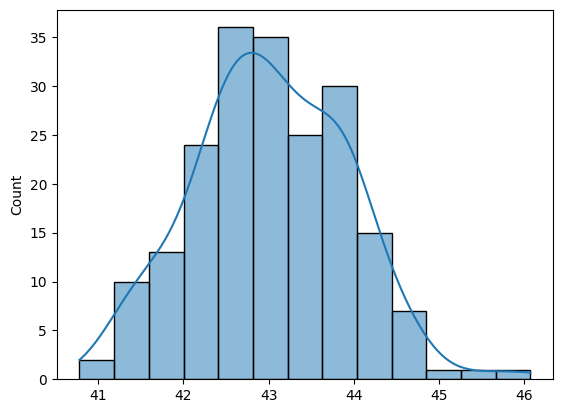

In [11]:
sns.histplot(point_estimates, kde=True)
plt.show()

In [12]:
print(np.array(point_estimates).mean())

43.021350000000005


In [13]:
from scipy.stats import norm

sample_size = 1000
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

z_critical = norm.ppf(q=0.975)
print(f"z-critical value: {z_critical}")

pop_stddev = population.std()

margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print(f"Confidence Interval: {confidence_interval}")

z-critical value: 1.959963984540054
Confidence Interval: (41.78425214484725, 43.42374785515275)


In [14]:
from scipy.stats import norm

sample_size = 1000
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

z_critical = norm.ppf(q=0.995)
print(f"z-critical value: {z_critical}")

pop_stddev = population.std()

margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print(f"Confidence Interval: {confidence_interval}")

z-critical value: 2.5758293035489004
Confidence Interval: (41.52166870030302, 43.676331299696976)


In [15]:
sample_size = 1000  
intervals = list()  # list of tuples
sample_means = list()

for sample in range(25):
    sample = np.random.choice(a=population, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = norm.ppf(q=0.975)
    pop_stddev = population.std()

    margin_of_error = z_critical * (pop_stddev / math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                          sample_mean + margin_of_error)

    intervals.append(confidence_interval)

[]

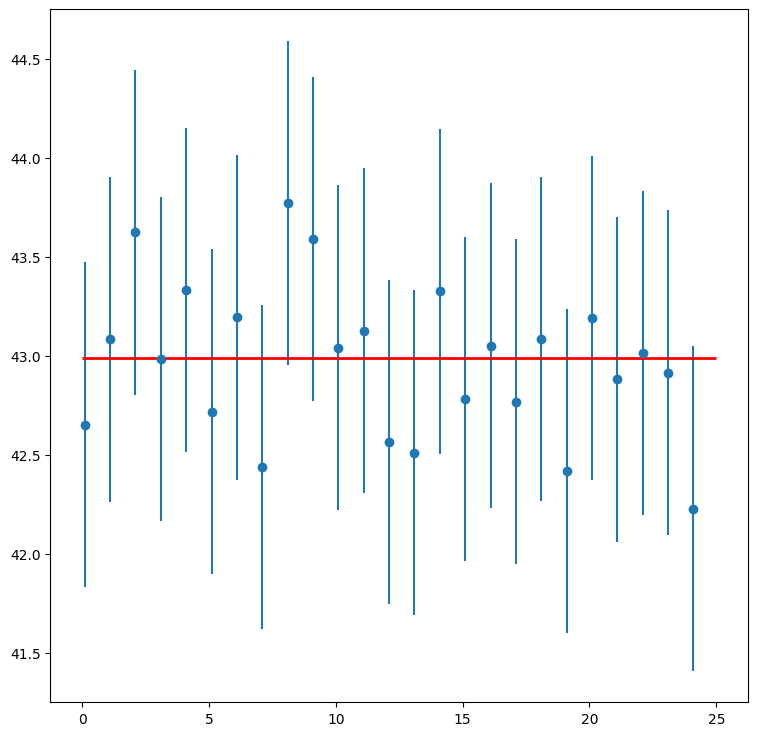

In [16]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[abs(top - bot) / 2 for top, bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=42.99, 
           linewidth=2.0,
           color="red")
plt.plot()

In [17]:
from scipy.stats import t

sample_size = 25
sample = np.random.choice(a=population, size=sample_size)
sample_mean = sample.mean()

t_critical = t.ppf(q=0.975, df=sample_size-1)

print(f"t-critical value: {t_critical}")

sample_stddev = sample.std(ddof=1)  

std_dev_estimate = sample_stddev / math.sqrt(sample_size)

margin_of_error = t_critical * (std_dev_estimate)

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Confidence interval: {confidence_interval}")

t-critical value: 2.0638985616280205
Confidence interval: (38.2030471400277, 49.0769528599723)


In [18]:
t.ppf(q=0.975, df=9999) - norm.ppf(q=0.975)

0.0002372790813034431

In [19]:
t.interval(
    confidence=0.95,  # Confidence interval, just write as it is, without splitting the alpha and adding it up.
    df=24,            # Degrees of freedom
    loc=sample_mean,  # Sample mean
    scale=std_dev_estimate       # Standard deviation estimate (Calculated in the above cell)
)

(38.2030471400277, 49.0769528599723)

In [20]:
z_critical = norm.ppf(0.975)

p = 0.203

n = 1000

margin_of_error = z_critical * math.sqrt((p * (1 - p)/n))

confidence_interval = (p - margin_of_error, p + margin_of_error)

confidence_interval

(0.17806982823847933, 0.2279301717615207)

In [21]:
norm.interval(
    confidence=0.95,
    loc=0.203,
    scale=math.sqrt((p * (1 - p)/n))
)

(0.17806982823847933, 0.2279301717615207)